## Diwali Sales Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
# to avoid encoding error, use 'unicode_escape'

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop null columns
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [7]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


### Check out missing values

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#We can see there are 12 null values in Amount column so we drop them

In [9]:
df.dropna(inplace = True)

In [10]:
# Drop null values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#No null values present 

In [11]:
df.shape

(11239, 13)

In [12]:
# Chnage data type 
df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtypes

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
#Statistical Summary of dataset
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# for specific columns
df[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


In [17]:
#Check for Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Length: 11239, dtype: bool

In [18]:
# Total no of duplicate value in dataset
df.duplicated().sum()

8

In [19]:
# Remove the duplicated values from the datasets
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().sum()

0

## Exploaratory Data Analysis.

### Male VS Female analysis

[Text(0, 0, '7828'), Text(0, 0, '3403')]

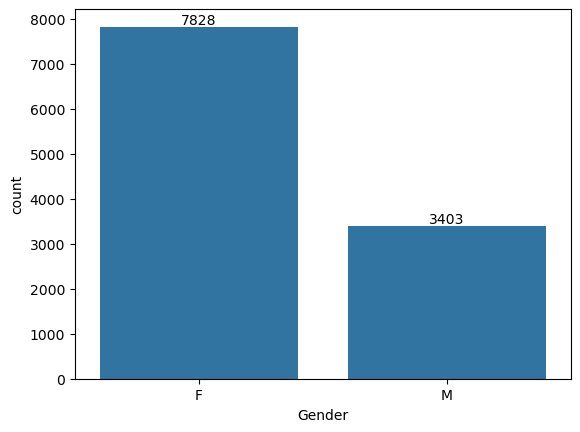

In [21]:
#Male VS Female Count
ax = sns.countplot(x = 'Gender', data = df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Gender', ylabel='Amount'>

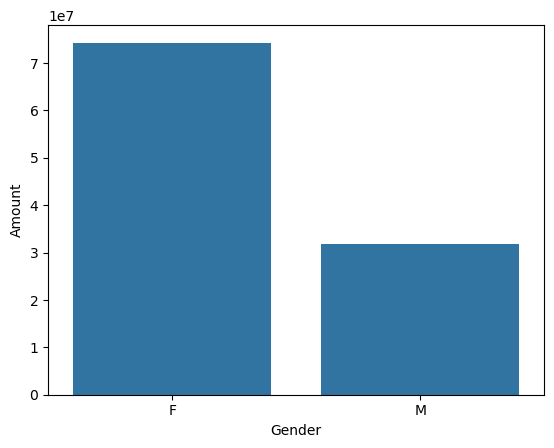

In [22]:
sales_gen = df.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

#From above we can see that women are the major buyers 

### Age 

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

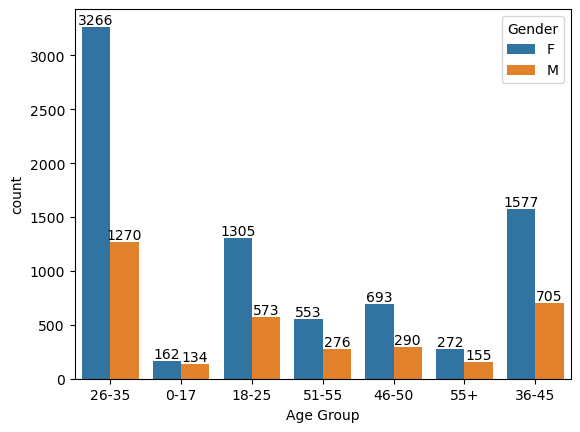

In [24]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

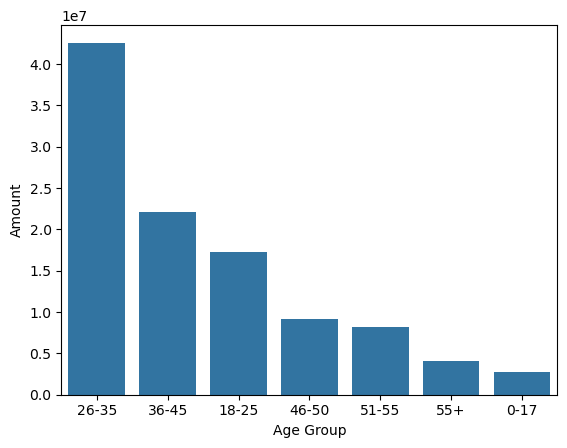

In [25]:
# Total Amunt bs Age Group
sales_age = df.groupby(['Age Group'],as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

From above graph we can see that most of the buyers are of age group between 26-35 yrs female

### State

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

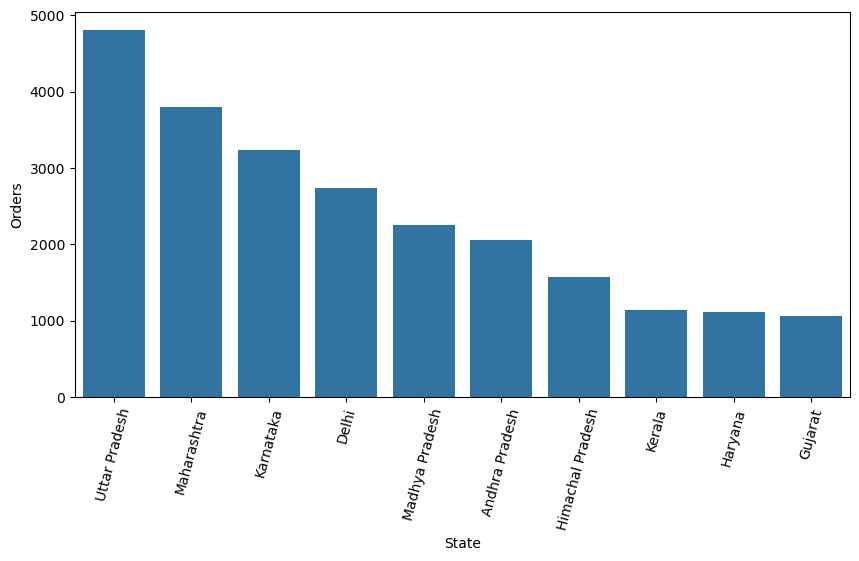

In [26]:
# Total no of Order from Top 10 States
plt.figure(figsize=(10,5) )
orders_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.barplot(x = 'State', y = 'Orders', data = orders_state)
plt.xticks(rotation=75)

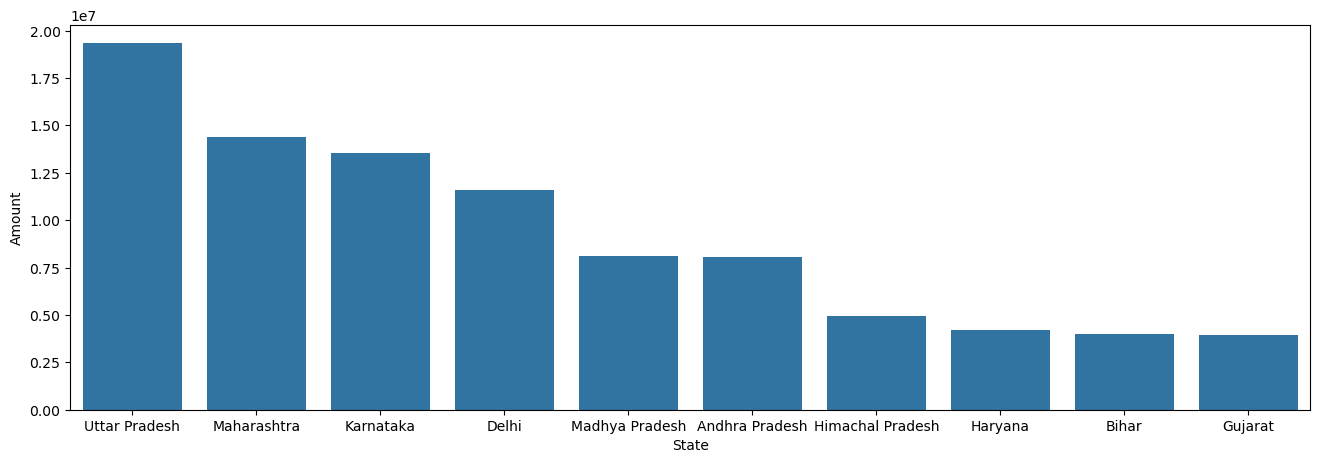

In [27]:
# Total amount/sales from top 10 states
plt.figure(figsize=(16,5) )
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.barplot(x = 'State', y = 'Amount', data = sales_state)
plt.xticks(rotation=0)

for bars in ax.containers:
    ax.bar_label(bars)


From above we can see that most of the orders & total sales are from Uttar Pradesh, Maharashtra and Karanataka respectively

### Marital Status

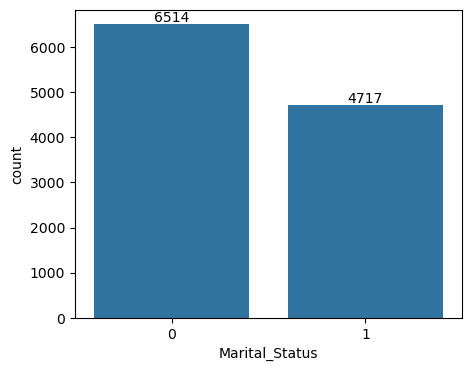

In [28]:
plt.figure(figsize= (5,4))
ax = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

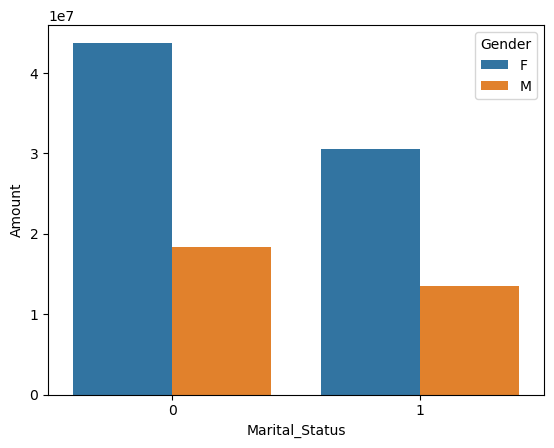

In [29]:
sales_Mstatus = df.groupby(['Marital_Status','Gender'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_Mstatus)

From above we can see that most of the buyers are Unmarried women and they have high purchasing power 

### Occupation

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [31]:
df['Occupation']

0             Healthcare
1                   Govt
2             Automobile
3           Construction
4        Food Processing
              ...       
11246           Chemical
11247         Healthcare
11248            Textile
11249        Agriculture
11250         Healthcare
Name: Occupation, Length: 11231, dtype: object

[Text(0, 0, '1408'),
 Text(0, 0, '854'),
 Text(0, 0, '565'),
 Text(0, 0, '413'),
 Text(0, 0, '423'),
 Text(0, 0, '531'),
 Text(0, 0, '637'),
 Text(0, 0, '1137'),
 Text(0, 0, '501'),
 Text(0, 0, '1581'),
 Text(0, 0, '1309'),
 Text(0, 0, '700'),
 Text(0, 0, '282'),
 Text(0, 0, '349'),
 Text(0, 0, '541')]

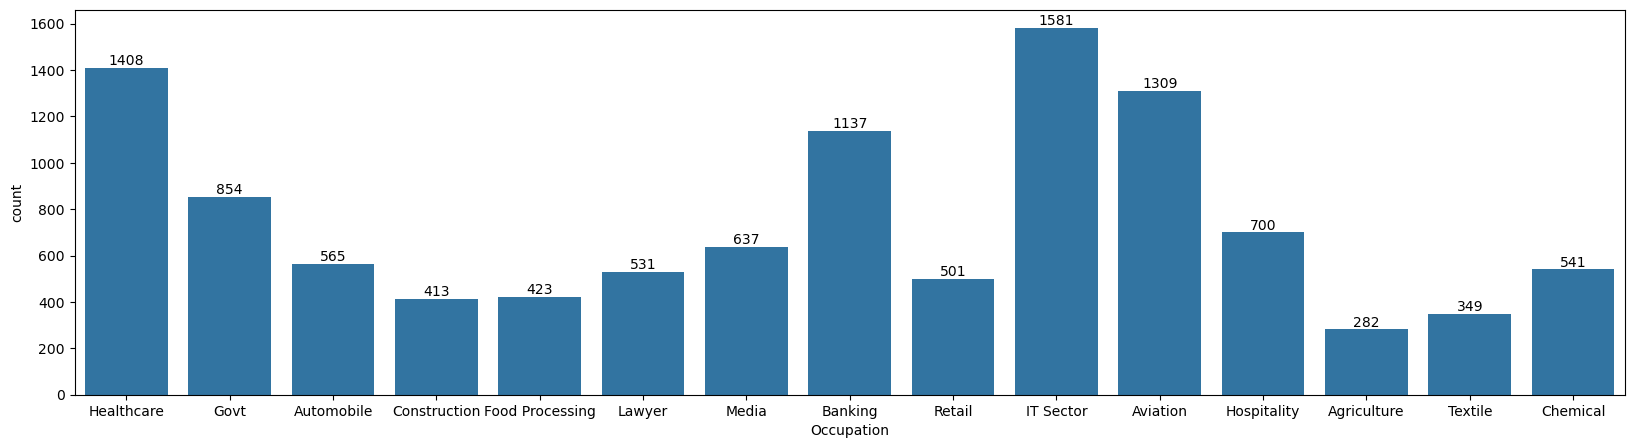

In [32]:
plt.figure(figsize = (20,5))
ax = sns.countplot(x = 'Occupation', data = df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Occupation', ylabel='Amount'>

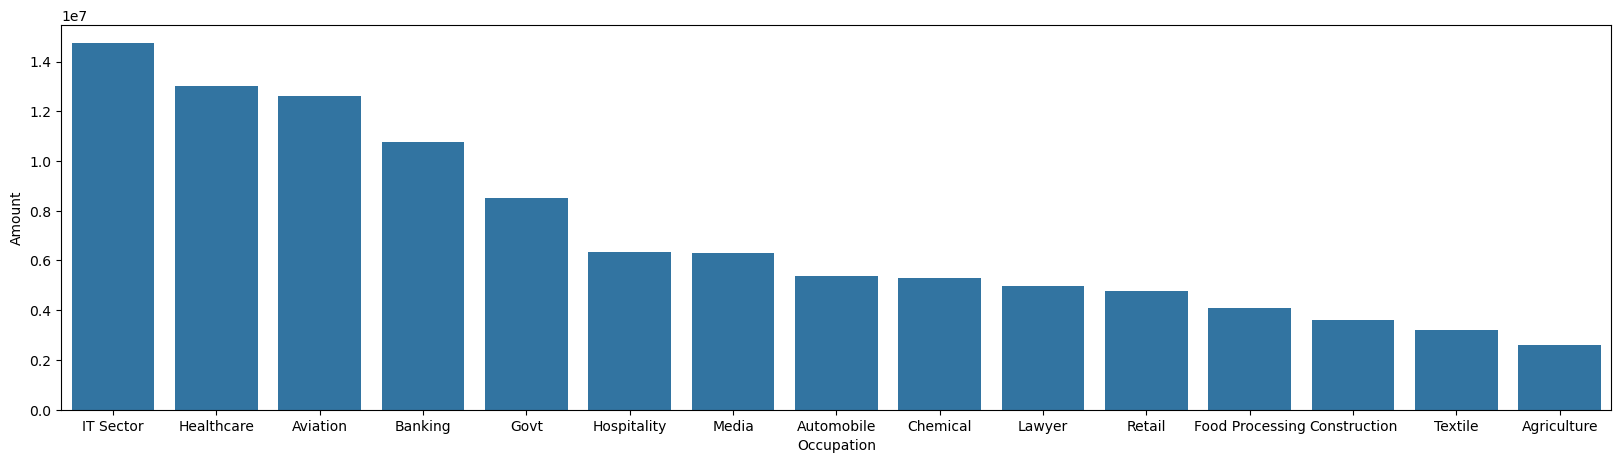

In [33]:
plt.figure(figsize = (20,5))
sales_occupation = df.groupby(['Occupation'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Occupation', y = 'Amount', data =sales_occupation  )

From above we can see that most of the buyers are working in IT, Aviation and Healthcare sector

### Product Category

In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

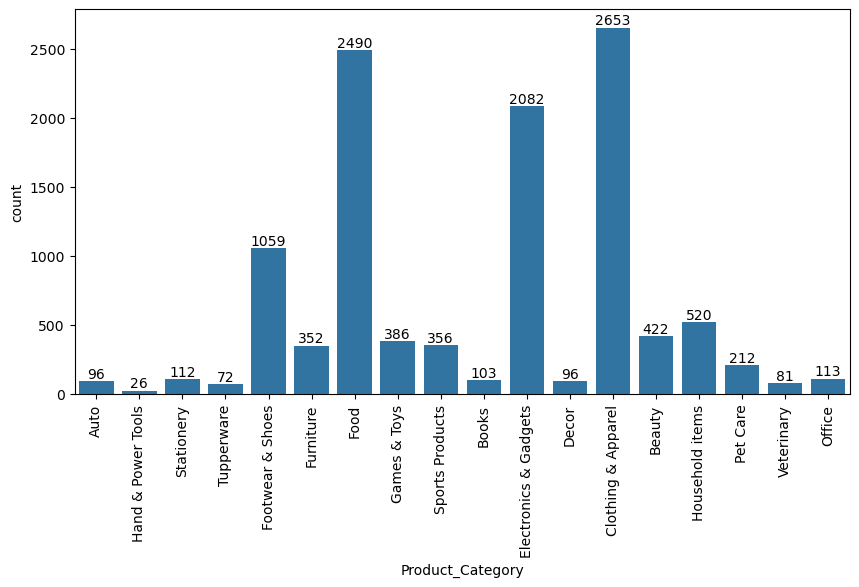

In [35]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Product_Category', data = df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

<Axes: xlabel='Product_Category', ylabel='Amount'>

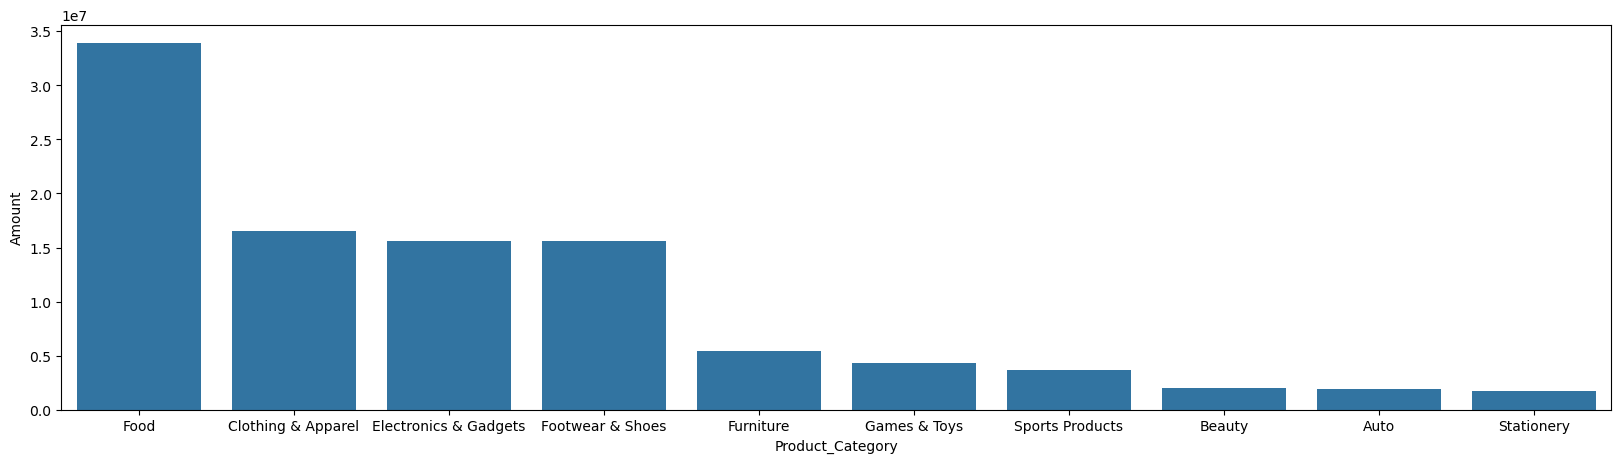

In [36]:
plt.figure(figsize = (20,5))
sales_Pcategory = df.groupby(['Product_Category'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.barplot(x = 'Product_Category', y = 'Amount', data =sales_Pcategory  )

From above we can see that most of the sold products are form Food, Clothing, Footwear and Electronics category.

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

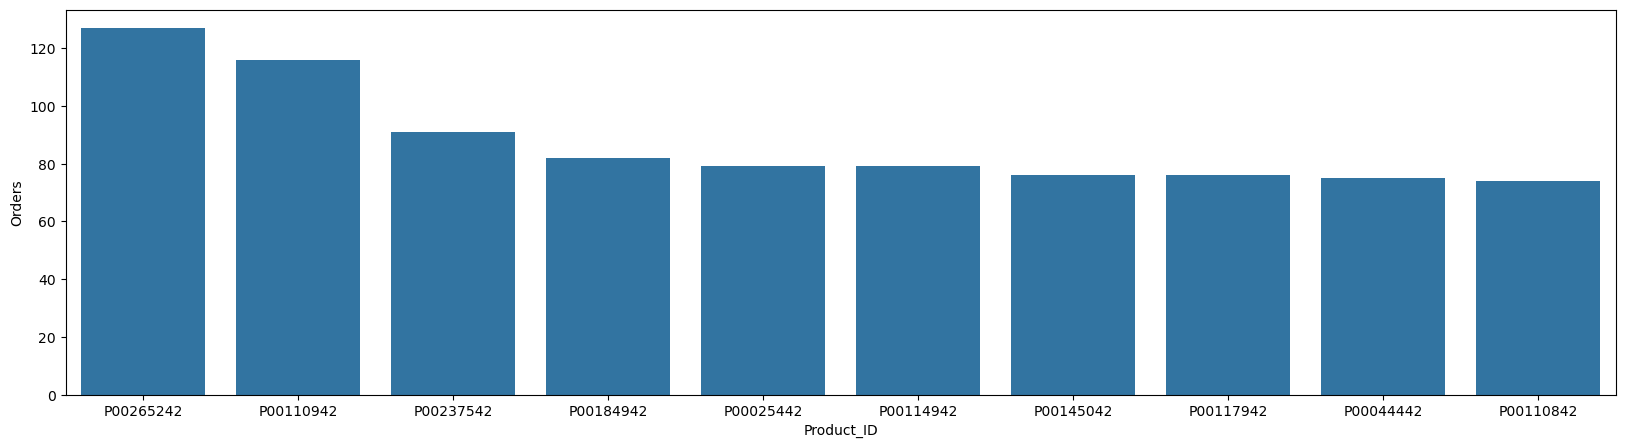

In [38]:
plt.figure(figsize=(20,5))
orders_Products = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(x = 'Product_ID', y = 'Orders', data = orders_Products)



















# CONCLUSION:

Married women age group 26-35 yrs from UP,Mahrashtra and Karantaka working in IT, Healthcare 
and Aviation are more likely to buy products from Food, Clothing and Electronics category